# Lecture 1: Closed system

### Basics

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt


$|\psi\rangle -$ “*ket-vector*” aka *quantum state* aka - state vector aka *wavefunction* is a vector in Hilbert space. For us, it’s a column with complex numbers.

In [2]:
ket1 = basis(2,0)
ket2 = Qobj([[0],[1]])
print(ket1, ket2)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]] Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


$\langle\psi|=(|\psi\rangle)^{+} -$ “*bra-vector*” - is a linear form. For us, it’s a row with complex numbers obtained from $|\psi\rangle$ by transposing and complex conjugation.

In [3]:
bra1 = ket1.dag()
print(bra1)

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]


$\langle\psi|\phi\rangle$ - *scalar product* aka *inner product* aka *dot-product* - is a complex number.

In [4]:
bra1 * ket2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


 $|\phi\rangle\langle\psi|=|\phi\rangle\otimes\langle\psi|$- *tensor product*. It acts as a linear operator and is typically written as a matrix.

In [5]:
ket2 * bra1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

## Two-level system

$$
|\psi\rangle = a|1\rangle+be^{i\phi}\ |2\rangle
$$

$$
a^2+b^2=1
$$

$$
|1\rangle\langle1|+|2\rangle\langle2|\approx\hat{I}
$$

In [6]:
ket1*ket1.dag()+ket2*ket2.dag() == qeye(2)

True

### True 2-level system: electron spin

$$
\hat{H} = -\hat{\mathbf{\vec{\mu}}}\cdot\vec{B}=-\gamma\left(\hat{s}_xB_x+\hat{s}_yB_y+\hat{s}_zB_z\right)
$$

$$
\gamma = -2\dfrac{\mu_B}{\hbar}
$$

$$
\hat{s}_i=\dfrac{\hbar}{2}\hat{\sigma}_i
$$

$$
\hat{H}=\dfrac{1}{2}\mu_B\left(\hat{\sigma}_xB_x+\hat{\sigma}_yB_y+\hat{\sigma}_zB_z\right)=\dfrac{\mu_B}{2}\hat{\vec{\sigma}}\cdot\vec{B}
$$

$\hat{\vec{\sigma}}$ - Pauli vector.

### Pauli matrices

Pauli matrices in $z$-basis (eigenvectors of $\hat{\sigma}_z$):

$$
\hat{\sigma}_x=\begin{pmatrix} 0 & 1\\
1 & 0
\end{pmatrix},\ \hat{\sigma}_y=\begin{pmatrix} 0 & -i\\
i & 0
\end{pmatrix},\ \hat{\sigma}_x=\begin{pmatrix} 1 & 0\\
0 & -1
\end{pmatrix}
$$

In [7]:
sx, sy, sz = sigmax(), sigmay(), sigmaz()
print(sx, sy, sz)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


**Properties:**

$\hat{\sigma}_i = \hat{\sigma}_i^{+}$

In [8]:
print(sx.dag(), sy.dag(), sz.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


---
$Tr(\hat{\sigma}_i)=0$

In [9]:
sx.tr(), sy.tr(), sz.tr()

(0.0, 0.0, 0.0)

---
$\hat{\sigma}_a \hat{\sigma}_b=\delta_{a b} \hat{I}+i \epsilon_{a b c} \hat{\sigma}_c$,
    - e.g.,      $\hat{\sigma}_i^2 = \hat{I}, \quad \hat{\sigma}_z\hat{\sigma}_x = i\hat{\sigma}_y, \quad \hat{\sigma}_y\hat{\sigma}_x=-i\hat{\sigma}_z$

In [10]:
sx**2, sz*sx, sy*sx

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
 Qobj data =
 [[ 0.  1.]
  [-1.  0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
 Qobj data =
 [[0.-1.j 0.+0.j]
  [0.+0.j 0.+1.j]])

---
$\operatorname{Tr}(\hat{\sigma}_a \hat{\sigma}_b)=2\delta_{a b}$

In [11]:
(sx*sx).tr(), (sx*sy).tr()

(2.0, 0.0)

---
$\left[\hat{\sigma}_a, \hat{\sigma}_b\right]=2 i \epsilon_{a b c} \hat{\sigma}_c,$\
    - e.g.,      $\left[\hat{\sigma}_z, \hat{\sigma}_x\right]=2 i  \hat{\sigma}_y, \quad  \left[\hat{\sigma}_y, \hat{\sigma}_x\right]=-2 i  \hat{\sigma}_z$

In [12]:
commutator(sz, sx), commutator(sy, sx)

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
 Qobj data =
 [[ 0.  2.]
  [-2.  0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
 Qobj data =
 [[0.-2.j 0.+0.j]
  [0.+0.j 0.+2.j]])

**Theorem (I recommend proving it yourself):**

Any Hermitian 2D operator $\hat{A}$ is a linear combination of the Pauli matrices and the Identity operator:

$$
\hat{A} = \alpha_0\hat{I} + \alpha_1\hat{\sigma}_x+\alpha_2\hat{\sigma}_y+\alpha_3\hat{\sigma}_z.
$$

It means that the Pauli matrices, together with the Identity operator, form a basis in the space of 2D Hermitian operators.

As a result, any Hamiltonian can be written as

$$
\hat{H}=E_0\hat{I}+\dfrac{\mu_B}{2}\hat{\vec{\sigma}}\cdot\vec{B}'=\dfrac{\hbar}{2}\left(\Omega_0\hat{I}+\hat{\vec{\sigma}}\cdot\vec{\Omega}\right),
$$

where $\vec{B}'$ is a *pseudo-field,* and $\vec{\Omega}$ is a pseudo-field expressed in frequency units. Terms with $\hat{I}$ do not affect the evolution and are usually dropped.

In other words, **any two-level system is equivalent to a spin-1/2**.

## Bloch vector

$\vec{\nu} = \langle \hat{\vec{\sigma}}\rangle = \begin{pmatrix} \langle \hat{\sigma}_x\rangle\\
\langle \hat{\sigma}_y\rangle\\ \langle \hat{\sigma}_z\rangle
\end{pmatrix}$- Bloch vector.

In some literature, it is called *pseudospin,* but in other literature, *pseudospin* refers to something else.

**Physical meaning**: measured projection of an electron’s spin onto $\vec{\nu}$, equals $\dfrac{\hbar}{2}\vec{\nu}$ with 100% probability.

### Connection to the quantum state

For $|\psi\rangle = a|1\rangle+be^{i\phi}\ |2\rangle$,

$$
\vec{\nu} = \langle\psi|\hat{\vec{\sigma}}|\psi\rangle = \begin{pmatrix}  2ab\cos\phi\\
 2ab\sin\phi\\  a^2-b^2
\end{pmatrix}=\begin{pmatrix}  \sin\theta\cos\phi\\
 \sin\theta\sin\phi\\  \cos\theta
\end{pmatrix},
$$

where $a = \cos\dfrac{\theta}{2},\ b=\sin\dfrac{\theta}{2}$.

In spherical coordinates $|\psi\rangle = \cos\dfrac{\theta}{2}|1\rangle+\sin\dfrac{\theta}{2}e^{i\phi}\ |2\rangle$.

The probabilities of the system to be measured in $|1\rangle$ and $|2\rangle$ are given by

$$
P_1=|\langle1|\psi\rangle|^2=\cos^2\dfrac{\theta}{2}=\dfrac{1+\nu_z}{2}, \quad P_2=|\langle2|\psi\rangle|^2=\sin^2\dfrac{\theta}{2}=\dfrac{1-\nu_z}{2}
$$

In terms of the Bloch vector, the probability of a system in state $|\psi_1\rangle$ to be measured in state $|\psi_2\rangle$ is given by

$$
P_{1,2}=|\langle\psi_2|\psi_1\rangle|^2=\dfrac{1+\vec{\nu}_1\cdot\vec{\nu}_2}{2}.
$$

### Properties summary

- 3D vector with real values.
- Can be defined for **any** two-level system.
- One-to-one correspondence between the state and the Bloch vector.
- $|\vec{\nu}| = 1$.
- **Orthogonal** states have **opposite** Bloch vectors.


## Bloch sphere

*Bloch sphere* - a 2D surface of all possible values of the Bloch vector.

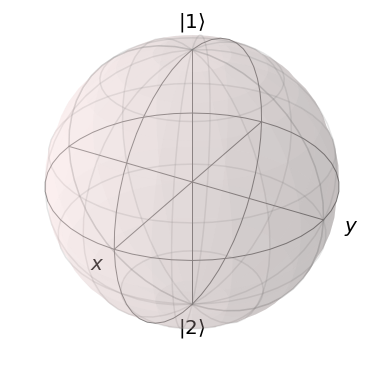

In [13]:
b = Bloch()
b.make_sphere()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.show()

Bloch vector of $|1\rangle$

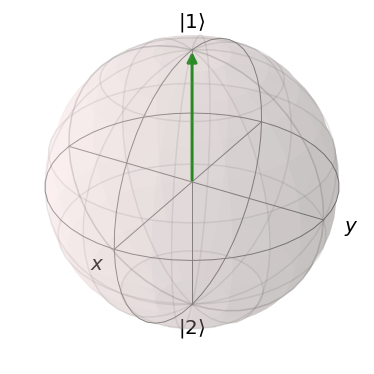

In [14]:
b.add_states(ket1)
b.show()

Bloch vector of $|2\rangle$

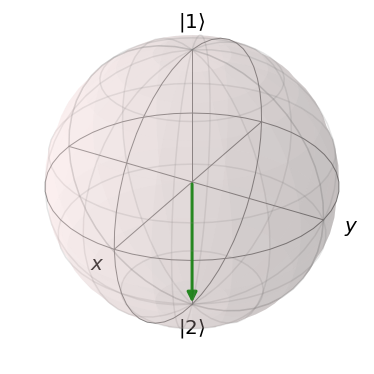

In [15]:
b.clear()
b.add_states(ket2)
b.show()

Bloch vector of $\dfrac{|1\rangle+|2\rangle}{\sqrt{2}}$

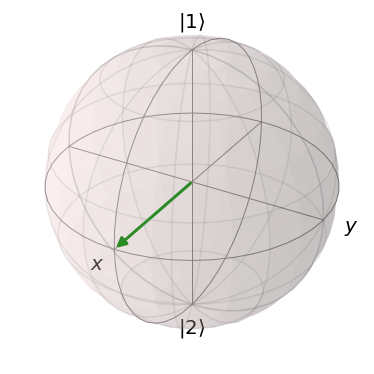

In [16]:
b.clear()
psi = ket1 + ket2
psi = psi.unit()
b.add_states(psi)
b.show()

Bloch vector of $\dfrac{|1\rangle-|2\rangle}{\sqrt{2}}$


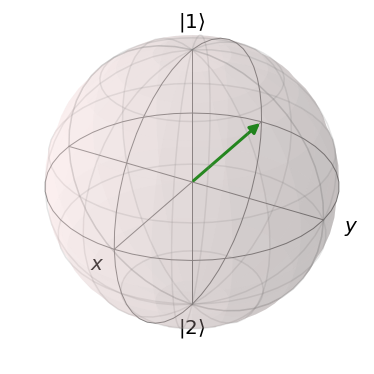

In [17]:
psi = ket1 - ket2
psi = psi.unit()
b.clear()
b.add_states(psi)
b.show()


# Density matrix

Imagine an ensemble with $N$ particles, $n_1$ of which are in a state $|\psi_1\rangle$ and $n_2$ of which are in a state $|\psi_2\rangle$. To describe the state of a random particle from this ensemble, we use a density matrix given by

$$
\hat{\rho}=p_1|\psi_1\rangle\langle\psi_1|+p_2|\psi_2\rangle\langle\psi_2|,
$$

where $p_1=\dfrac{n_1}{N}$ and $p_2=\dfrac{n_2}{N}$.

This expression can be generalized to a *statistical ensemble* if we treat $p_1$ and $p_2$ as the classical probabilities to be in states $|\psi_1\rangle$ and $|\psi_2\rangle$, respectively. It means, that we perform $N$ identical experiments to the same particle, which $n_1$ of $N$ times starts in state $|\psi_1\rangle$ and $n_2$ of $N$ times it starts in state $|\psi_2\rangle$

The expectation value of an operator $\hat{A}$ is given by

$$
\langle\hat{A}\rangle=Tr\left(\hat{A}\cdot\hat{\rho}\right).
$$

### Density matrix coefficients

$$
\hat{\rho}=\begin{pmatrix} \rho_{11} & \rho_{12}\\
\rho_{21} & \rho_{22}
\end{pmatrix}
$$

Diagonal terms are called $populations$ and equal the probabilities of the system to be measured in the corresponding basis states. As a result, $Tr(\hat{\rho})=1$ (this is true for a system with an arbitrary number of levels).

Off-diagonal terms are complex numbers called $coherences$. They are non-zero is the systems state is a non-trivial linear combination (superposition) of the basis states.

### Pure and mixed states

When all particles in the ensemble are in the same quantum state, i.e.,

$$
\hat{\rho} = |\psi\rangle\langle\psi|
$$

such an ensemble is called *polarized*, and its quantum state is called *pure*. Otherwise, the ensemble is *unpolarized,* and the state is *mixed*.

### Mixed state vs superposition

Let’s consider two quantum systems.

System 1is in the state $|+\rangle=\dfrac{|\uparrow\rangle+|\downarrow\rangle}{\sqrt{2}}$.

System 2 is in the state $\hat{\rho}=\dfrac{1}{2}|\uparrow\rangle\langle\uparrow|+\dfrac{1}{2}|\downarrow\rangle\langle\downarrow|$.

- Are they different?

    Yes.

     System 1 is polarized along $x$-axis: $\langle\hat{\sigma}_x\rangle=1,\quad\langle\hat{\sigma}_y\rangle=\langle\hat{\sigma}_z\rangle=0$.

     System 2 is unpolarized: $\langle\hat{\sigma}_x\rangle=\langle\hat{\sigma}_y\rangle=\langle\hat{\sigma}_z\rangle=0$.


BTW, for System 2, $\hat{\rho}$  is a 50/50 mixture in any orthogonal basis.


## Bloch vector of an ensemble

$$
\vec{\nu}=\left(\begin{array}{l}\left\langle\hat{\sigma}_x\right\rangle \\\left\langle\hat{\sigma}_y\right\rangle \\\left\langle\hat{\sigma}_z\right\rangle\end{array}\right)=\left(\begin{array}{c}\operatorname{Tr}\left(\hat{\sigma}_x \hat{\rho}\right) \\\operatorname{Tr}\left(\hat{\sigma}_y \hat{\rho}\right) \\\operatorname{Tr}\left(\hat{\sigma}_z \hat{\rho}\right)\end{array}\right)=\left(\begin{array}{c}\rho_{12}+\rho_{21} \\ i(\rho_{12}-\rho_{21})  \\\rho_{11}-\rho_{22} \end{array}\right)=\left(\begin{array}{c}2\operatorname{Re}(\rho_{12})\\ 2\operatorname{Im}(\rho_{12})  \\\rho_{11}-\rho_{22} \end{array}\right)
$$

or, in terms of the Bloch vector, the density matrix is given by

$$
\hat{\rho}=\dfrac{1}{2}\left(\hat{I}+\vec{\nu}\cdot\hat{\vec{\sigma}}\right)=\dfrac{1}{2}\left(\hat{I}+\nu_x\hat{\sigma}_x+\nu_y\hat{\sigma}_y+\nu_z\hat{\sigma}_z\right)
$$


### Bloch vector of a mixed state

Because $\langle\rangle$ is a linear operation, the Bloch vector of a mixed state is a linear combination of the Bloch vectors corresponding to the individual states.

E.g., for $\hat{\rho}=p_1\left|\psi_1\right\rangle\left\langle\psi_1\left|+p_2\right| \psi_2\right)\left\langle\psi_2\right|$, the Bloch vector is given by

$$
\vec{\nu}=p_1\vec{\nu}_1+p_2\vec{\nu}_2.
$$

As a result,

$$
|\vec{\nu}|=\sqrt{p_1^2|\vec{\nu}_1|+2p_1p_2\vec{\nu_1}\vec{\nu_2}+p_2^2|\vec{\nu}_2|}<\sqrt{(p_1+p_2)^2}<1
$$

So, for a mixed state, the Bloch vector is inside the Bloch sphere.

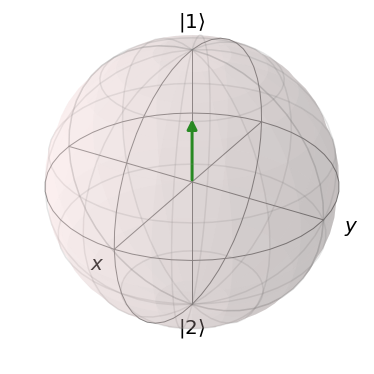

In [18]:
p = 0.75
rho = p*ket1*ket1.dag() + (1-p)*ket2*ket2.dag()
b.clear()
b.add_states(rho)
b.show()


### Bloch vector and energy

$$
\langle E\rangle=\operatorname{Tr}(\hat{H} \hat{\rho})
$$

Using

$$
\hat{H}=\dfrac{\hbar}{2}\vec{\Omega}\cdot\hat{\vec{\sigma}}, \quad \hat{\rho}=\dfrac{1}{2}\left(\hat{I}+\vec{\nu}\cdot\hat{\vec{\sigma}}\right), \quad \operatorname{Tr}(\hat{\sigma}_a \hat{\sigma}_b)=2\delta_{a b}
$$

we obtain

$$
\langle E\rangle=\dfrac{\hbar}{2}\vec{\nu}\cdot \vec{\Omega}
$$


## Time evolution

The density matrix evolution is described by the ****Liouville equation:****

$$
i \hbar \frac{\partial \hat{\rho}}{\partial t}=[\hat{H}, \hat{\rho}]
$$

Let’s write the Hamiltonian and the density matrix using Einstein’s summation

$$
\hat{H}=\dfrac{\hbar}{2}\left(\Omega_x\hat{\sigma}_x+\Omega_y\hat{\sigma}_y+\Omega_z\hat{\sigma}_z\right)=\dfrac{\hbar}{2}\Omega_l\cdot\hat{\sigma}_l
$$

$$
\hat{\rho}=\dfrac{1}{2}\left(1+\nu_l\cdot\hat{\sigma}_l\right)
$$

$$
\dfrac{d\hat{\rho}}{dt}=\dfrac{1}{2}\dot{\nu}_m\hat{\sigma}_m=\frac{1}{2 i \hbar} \frac{\hbar}{2} \Omega_k \nu_l\left[\sigma_k, \sigma_l\right]
$$

Using $\left[\hat{\sigma}_a, \hat{\sigma}_b\right]=2 i \epsilon_{a b c} \hat{\sigma}_c,$  we obtain

$$
\dot{\nu}_m\hat{\sigma}_m = \Omega_k\nu_l\hat{\sigma}_m\epsilon_{klm}.
$$

By applying $\operatorname{Tr}(\hat{\sigma}_i\cdot)$ to both sides and use $\operatorname{Tr}(\hat{\sigma}_a \hat{\sigma}_b)=2\delta_{a b}$ , we get

$$
\dot{\nu}_m= \Omega_k\nu_l\epsilon_{klm} = \left[\vec{\Omega}\times\vec{\nu}\right]_m
$$

In the vector form, the equation of motion is given by

$$
\dot{\vec{\nu}}=\vec{\Omega}\times\vec{\nu},
$$

which describes a precession around the axis given by $\vec{\Omega}$ at an angular frequency $|\vec{\Omega}|.$ In general, $\vec{\Omega}$ can be time-dependent.

Since the Bloch vector magnitude is unaffected, the states’ purity is unchanged.

### Stationary states

$$
\dot{\vec{\nu}}=\vec{0}, \quad \vec{\nu}_{\pm}=\pm\dfrac{\vec{\Omega}}{\Omega}\alpha, \quad E_{\pm} = \pm\dfrac{\hbar\Omega}{2}\alpha, \quad 0\le \alpha\le1'
$$

where $\alpha=1$ corresponds to a pure state, and $\alpha=0$ corresponds to a fully mixed state.

### Larmor precession

$$
\hat{H}=\dfrac{\hbar}{2}\Omega\hat{\sigma}_z, \quad \vec{\nu}(t) = \begin{pmatrix}  \nu_x(0)\cos\Omega t\\
\nu_x(0)\sin\Omega t\\  \nu_z(0)
\end{pmatrix}
$$

Note that both $x$ and $y$ components have $\nu_x(0)$.

In [19]:
# Hamiltonian
omega_z = 2*np.pi
H = 0.5 * omega_z * sigmaz()

# Time grid
T = 1 # duration
N = 100 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1*ket1.dag()
P2 = ket2.proj()

# Initial state
psi0 = (ket1 + ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, [], [P1, P2, sigmax(), sigmay(), sigmaz()])

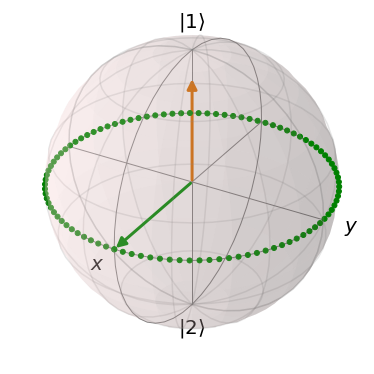

In [20]:
# Evolution on the Bloch sphere
b = Bloch()
b.make_sphere()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

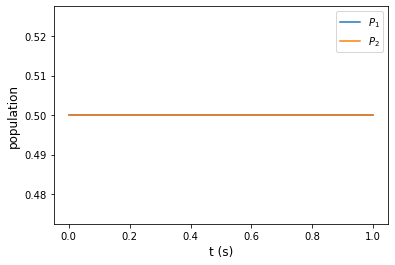

In [21]:
# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)

### Rabi oscillations: magnetic dipole and circular field

Magnetic field: $\vec{B}=B_0 \hat{z}+B(\hat{x} \cos \omega t+\hat{y} \sin \omega t)$

Interaction Hamiltonian:

$$
\hat{H}=-\hat{\vec{\mu}} \cdot \vec{B}=\frac{\mu_B}{\hbar} B_0 \hat{s}_z+\frac{\mu_{B}B}{\hbar}\left(\hat{s}_x \cos \omega t+\hat{s}_y \sin \omega t\right)
$$

In terms of Pauli matrices:

$$
\hat{H}=\dfrac{\hbar}{2}\hat{\sigma}_{z}\omega_0 +\dfrac{\hbar}{2}\Omega_x\left(\hat{\sigma}_{x}\cos\omega t+\hat{\sigma}_{y}\sin\omega t\right)=\dfrac{\hbar}{2}\hat{\sigma}_{z}\omega_0 +\dfrac{\hbar}{2}\Omega_x\begin{pmatrix} 0 & e^{-i\omega t}\\
e^{i\omega t} & 0
\end{pmatrix},
$$

where $\omega_0=\dfrac{\mu_B B_0}{\hbar}$ and $\Omega_x=\dfrac{\mu_B B}{\hbar}$.

Let’s move to a frame rotating around $\hat{z}$ at the frequency  $\omega$.

Rotation operator:

$$
\hat{U}=\operatorname{exp}\left(-i \frac{\omega t}{2} \hat{\sigma}_z\right)=\left(\begin{array}{cc}
e^{-i \frac{\omega t}{2}} & 0 \\
0 & e^{\frac{i \omega t}{2}}
\end{array}\right)
$$

The Hamiltonian in the rotating frame:

$$
\hat{H}_R=\hat{U}^{-1} \hat{H} \hat{U}+i \hbar \dfrac{d}{dt}\left(\hat{U}^{-1}\right)\hat{U}=\dfrac{\hbar}{2}\left(\Omega_x \hat{\sigma}_x- \delta\hat{\sigma}_z \right),
$$

where $\delta=\omega-\omega_0$

- Note that moving into a rotating frame introduces a fictitious pseudo-field  $\vec{B}'=\gamma\omega\hat{z}$.

The evolution is given by

$$
\dot{\vec{\nu}}=\left(\begin{array}{c}\Omega_x \\0 \\ -\delta\end{array}\right) \times \vec{\nu}=\vec{\Omega}\times\vec{\nu}
$$

which is a precession around vector $\vec{\Omega}=\left(\Omega_x,0,-\delta\right)$ at a frequency $\Omega=\sqrt{\Omega_x^2+\delta^2}$

Let’s calculate the transition probability for a system starting in $|1\rangle$.

First, let’s consider the evolution in $x',y',z'$ coordinates, where $z'$ is along $\vec{\Omega}$. The angle $\alpha$ between $z'$ and $z$ is such that $\cos\alpha = \dfrac{\delta}{\Omega}$ and $\sin\alpha=\dfrac{\Omega_x}{\Omega}$.

![Fig. 1](Rabi.png)


In this frame, the evolution is equivalent to the Larmor precession, so

$$
\vec{\nu}'(t) = \begin{pmatrix}  \nu_{x'}(0)\cos\Omega t\\
\nu_{x'}(0)\sin\Omega t\\  \nu_{z'}(0)
\end{pmatrix}=\begin{pmatrix}  -\sin\alpha\cos\Omega t\\
-\sin\alpha\sin\Omega t\\  \cos\alpha
\end{pmatrix}
$$

The transition probability depends on $\nu_z$, which is given by

$$
\nu_z(t)=\nu_{z'}(t)\cos\alpha-\nu_{x'}(t)\sin\alpha=\cos^2\alpha+\sin^2\alpha\cos\Omega t
$$

The transition probability is given by

$$
P(t)=|\langle2|\psi(t)\rangle|^2=\dfrac{1-\nu_z(t)}{2}=\dfrac{1-\cos\Omega t}{2}\sin^2\alpha=\sin\alpha^2\sin^2\dfrac{\Omega t}{2}=\dfrac{\Omega_R^2}{\Omega_R^2+\delta^2}\sin^2\left(\dfrac{\sqrt{\Omega_R^2+\delta^2} t}{2}\right),
$$

where $\Omega_R = \Omega_x$ is the *Rabi frequency*. $\Omega$ is sometimes called *generalized Rabi frequency*.

In [22]:
# RWA Hamiltonian
delta = 2*np.pi
omega_x = 2*np.pi
H = 0.5 * (delta*sigmaz() + omega_x*sigmax())

# Time grid
T = 1 # duration
N = 100 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1*ket1.dag()
P2 = ket2.proj()

# Initial state
psi0 = ket1

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, [], [P1, P2, sigmax(), sigmay(), sigmaz()])

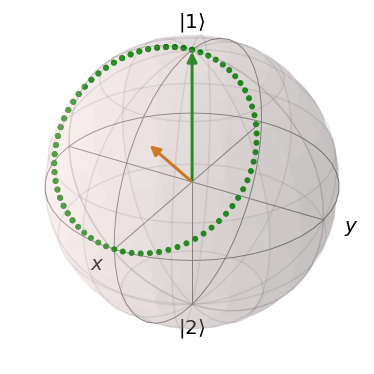

In [23]:
# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

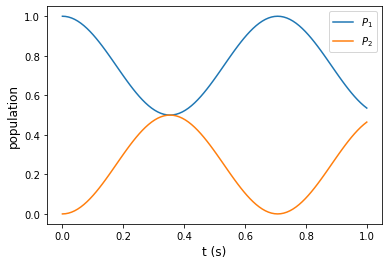

In [24]:
# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)


### Rabi oscillations: magnetic dipole and a linear field

Magnetic field: $\vec{B}=B_0 \hat{z}+B\hat{x} \cos \omega t$

$$
\hat{H}=\dfrac{\hbar}{2}\hat{\sigma}_{z}\omega_0 +\dfrac{\hbar}{2}\hat{\sigma}_{x}\Omega_x\cos\omega t=\dfrac{\hbar}{2}\hat{\sigma}_{z}\omega +\dfrac{\hbar}{4}\Omega_x\begin{pmatrix} 0 & e^{i\omega t}+e^{-i\omega t}\\
e^{i\omega t}+e^{-i\omega t} & 0
\end{pmatrix}
$$

In the rotating frame

$$
\hat{H}_R=\hat{U}^{-1} \hat{H} \hat{U}+i \hbar \dfrac{d}{dt}\left(\hat{U}^{-1}\right)\hat{U}=\dfrac{\hbar}{2}\left(\dfrac{\Omega_x}{2} \hat{\sigma}_x- \delta\hat{\sigma}_z \right)+\begin{pmatrix} 0 & e^{i2\omega t}\\
e^{-i2\omega t} & 0
\end{pmatrix}
$$

Rotating-wave approximation: ignore the last term if $\omega\gg\sqrt{\Omega_x^2+\delta^2}$.

$$
\hat{H}_{RWA}=\dfrac{\hbar}{2}\left(\Omega_R \hat{\sigma}_x- \delta\hat{\sigma}_z \right),
$$

where $\Omega_R = \Omega_x/2$. Same solution as before.

In [25]:
'''Time-dependent solution'''

# Time grid
T = 1 # duration
N = 1000 # number of points
t = np.linspace(0,T,N) # time grid

# Hamiltonian
omega_z = 20*2*np.pi
omega_x = 2*np.pi
delta = 0*2*np.pi
H0 = 0.5*omega_z*sigmaz() # Time-independent part
Ht = omega_x*sigmax() # Matrix part of the time-dependent term

# Functional part of the time-dependent term
def f(t,args):
    """function describing dependence on time"""
    return np.cos((omega_z + delta)*t)

# Total Hamiltonian
H = [H0, [Ht, f]]

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Initial state
psi0 = ket1

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, [], [P1, P2, sigmax(), sigmay(), sigmaz()])

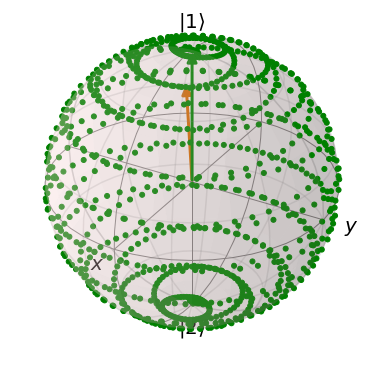

In [26]:
# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*(H0+Ht).unit()])
b.point_color=['green']
b.show()

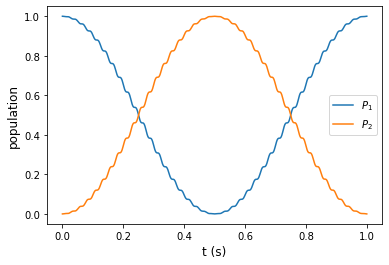

In [27]:
# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)

### Population transfer

$$
\hat{H}=\dfrac{\hbar}{2}\Omega_x(t)\hat{\sigma}_x,\quad |\psi(0)\rangle=|1\rangle
$$

$$
\dot{\theta}=\Omega_x(t), \quad \theta(T)=\int_0^{T}\Omega_x(t)dt
$$

$$
|\psi(T)\rangle=\cos \frac{\theta(T)}{2}|1\rangle-i \sin \frac{\theta(T)}{2}|2\rangle
$$

- $\pi/2$-pulse:

    $$
    \theta(T)=\pi/2,\quad |\psi(T)\rangle=\dfrac{1}{\sqrt{2}}\left(|1\rangle-i|2\rangle \right)
    $$

- $\pi$-pulse:

    $$
    \theta(T)=\pi,\quad |\psi(T)\rangle=-i|2\rangle
    $$

- $2\pi$-pulse:

    $$
    \theta(T)=2\pi,\quad |\psi(T)\rangle=-|2\rangle
    $$


### Amplitude-modulated resonant field

Magnetic field: $\vec{B}=B_0 \hat{z}+\left(1+m\cos\omega_m t\right)B\hat{x} \cos \omega_0 t$

RWA Hamiltonian in the rotating frame is given by

$$
\hat{H}_{RWA}=\frac{\hbar \Omega(t)}{2} \hat{\sigma}_x,\quad\Omega(t)=\Omega\left(1+m \cos \omega_m t\right)
$$

$$
\begin{aligned}\dot{\theta} &=\Omega+m\Omega \cos \omega t \\\theta(t) &=\Omega t+\frac{m\Omega}{\omega} \sin \omega t\end{aligned}
$$

The transition probability

$$
P(t)=
\frac{1}{2}\left(1-J_0\left(\frac{m \Omega}{\omega_m}\right) \cos \Omega t\right)
-\left[\sum_{k=1}^{\infty} J_{2 k}\left(\frac{m \Omega}{\omega_m}\right) \cos \left(2 k \omega_m t\right)\right] \cos \Omega t+\left[\sum_{k=0}^{\infty} J_{2 k+1}\left(\frac{m \Omega}{\omega_m}\right) \sin \left([2 k+1] \omega_m t\right)\right] \sin \Omega t.
$$